# 08-LEARN-DataAnalysisML

In [1]:
import pandas as pd

In [2]:
from constrain.lab.transformation import ODtime, ng_to_nmol

This is the data after data processing in the previous notebook. 

Lets setup AutoML

In [3]:
import h2o
from h2o.automl import H2OAutoML

In [4]:
# If this doesnt work - install java. 
# Start the H2O cluster (locally)
h2o.init(ip="localhost", port=54323)

Checking whether there is an H2O instance running at http://localhost:54323 . connected.


H2O_cluster_uptime:,1 day 0 hours 30 mins
H2O_cluster_timezone:,Europe/Copenhagen
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.1.3
H2O_cluster_version_age:,19 days
H2O_cluster_name:,H2O_from_python_lucaslevassor_wcjt61
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.125 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


### Import out dataframe to h20 object

Train a model based on the target and the df

In [5]:
# Run ML with new input 

new_input_for_ml = pd.read_csv('../data/processed/input_for_ml_reseq.csv')
new_input_for_ml

,Line Name,0,1,2,3,Amt_norm
0,yp49_A01,1,2,5,1,0.972701
1,yp49_A02,1,3,8,1,0.269401
2,yp49_A04,1,3,8,2,0.202699
3,yp49_A06,1,2,6,2,1.133272
4,yp49_A07,1,1,5,3,0.981070
...,...,...,...,...,...,...
161,yp51_E05,8,3,6,8,0.000000
162,yp51_E07,8,1,8,9,6.795506
163,yp51_E08,8,4,5,9,0.668263
164,yp51_E11,8,3,7,10,0.000000


In [6]:
df_test = h2o.H2OFrame(pd.concat([new_input_for_ml], axis='columns'))
df_test.describe()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Rows:166
Cols:6




,Line Name,0,1,2,3,Amt_norm
type,string,int,int,int,int,real
mins,NaN,1.0,1.0,5.0,1.0,0.0
mean,NaN,4.566265060240965,2.6927710843373482,6.566265060240965,5.319277108433736,17.20841465493667
maxs,NaN,8.0,4.0,8.0,10.0,277.3078163064027
sigma,NaN,2.2519635665513875,1.1581890914364779,1.1723353650321857,2.8392042347076565,40.8029369946811
zeros,0,0,0,0,0,59
missing,0,0,0,0,0,0
0,yp49_A01,1.0,2.0,5.0,1.0,0.972700677969159
1,yp49_A02,1.0,3.0,8.0,1.0,0.2694007038642038
2,yp49_A04,1.0,3.0,8.0,2.0,0.2026994926097329


# This is where we change the category

In [7]:
# Since the data is categorical we need to make it from numerical to categorical 

#df_test['0']= df_test['0'].asfactor()
#df_test['1']= df_test['1'].asfactor()
#df_test['2'] = df_test['2'].asfactor()
#df_test['3'] = df_test['3'].asfactor()


In [8]:
df_test.describe()

Rows:166
Cols:6




,Line Name,0,1,2,3,Amt_norm
type,string,int,int,int,int,real
mins,NaN,1.0,1.0,5.0,1.0,0.0
mean,NaN,4.566265060240965,2.6927710843373482,6.566265060240965,5.319277108433736,17.20841465493667
maxs,NaN,8.0,4.0,8.0,10.0,277.3078163064027
sigma,NaN,2.2519635665513875,1.1581890914364779,1.1723353650321857,2.8392042347076565,40.8029369946811
zeros,0,0,0,0,0,59
missing,0,0,0,0,0,0
0,yp49_A01,1.0,2.0,5.0,1.0,0.972700677969159
1,yp49_A02,1.0,3.0,8.0,1.0,0.2694007038642038
2,yp49_A04,1.0,3.0,8.0,2.0,0.2026994926097329


Set some arguments for the autoML. 


Important here is that we dont split the dataset but rather keep the cross-validation validate a model internally, i.e., estimate the model performance without having to sacrifice a validation split. See: https://docs.h2o.ai/h2o/latest-stable/h2o-docs/cross-validation.html


### RUN automl

Here we are defining the autoML object and after we can train it

In [9]:
# Select the columns we want to train on
feature_cols = [0, 1, 2, 3]

# Initialize H2O autoML class
AutoML = H2OAutoML(
    max_runtime_secs=int(0),  # 1 hour, if unlimited time is wanted then set this to zero = 0
    max_models=None,  # no limit
    nfolds=5,         # number of folds for k-fold cross-validation (nfolds=0 disables cross-validation)
    seed=1,            # Reproducibility
    keep_cross_validation_predictions=True 
)

Train a model based on the target and the df. 


It has been Commented out and saved as showed below

In [10]:
%%time

AutoML.train(
     x=feature_cols,
     y='Amt_norm',
     training_frame=df_test,
 )


AutoML progress: |
09:52:08.251: _train param, Dropping bad and constant columns: [Line Name]


09:52:08.740: _train param, Dropping bad and constant columns: [Line Name]


09:52:09.19: _train param, Dropping bad and constant columns: [Line Name]
09:52:09.19: _min_rows param, The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 166.0.
09:52:09.21: _train param, Dropping unused columns: [Line Name]


09:52:09.392: _train param, Dropping bad and constant columns: [Line Name]
09:52:09.566: _train param, Dropping bad and constant columns: [Line Name]

██
09:52:10.164: _train param, Dropping bad and constant columns: [Line Name]
09:52:10.512: _train param, Dropping bad and constant columns: [Line Name]


09:52:10.759: _train param, Dropping bad and constant columns: [Line Name]

█
09:52:11.82: _train param, Dropping unused columns: [Line Name]
09:52:11.249: _train param, Dropping unused columns: [Line Name]
09:52:11.379: _train p

,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,43.0,43.0,11664.0,5.0,9.0,6.116279,15.0,19.0,16.976744




ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 365.3800597539746
RMSE: 19.114917204999205
MAE: 8.859078107289521
RMSLE: NaN
Mean Residual Deviance: 365.3800597539746

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 530.9976369327745
RMSE: 23.043385969357335
MAE: 11.685265303210125
RMSLE: NaN
Mean Residual Deviance: 530.9976369327745

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,11.987988,4.517058,16.374557,11.060700,8.902380,6.705929,16.896378
1,mean_residual_deviance,563.094800,305.763100,749.344400,500.925900,474.666500,140.944920,949.592200
2,mse,563.094800,305.763100,749.344400,500.925900,474.666500,140.944920,949.592200
3,r2,0.590239,0.220465,0.235692,0.708767,0.823176,0.577579,0.605978
4,residual_deviance,563.094800,305.763100,749.344400,500.925900,474.666500,140.944920,949.592200
5,rmse,22.845970,7.172557,27.374157,22.381374,21.786842,11.872023,30.815454
6,rmsle,NaN,0.000000,NaN,NaN,NaN,NaN,NaN



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
0,,2022-07-28 09:52:43,22.557 sec,0.0,40.679852,24.924673,1654.850329
1,,2022-07-28 09:52:43,22.563 sec,5.0,31.873394,18.699481,1015.913214
2,,2022-07-28 09:52:43,22.568 sec,10.0,26.724618,14.504763,714.205233
3,,2022-07-28 09:52:43,22.573 sec,15.0,23.645611,12.052260,559.114937
4,,2022-07-28 09:52:43,22.579 sec,20.0,21.653594,10.583738,468.878126
5,,2022-07-28 09:52:43,22.584 sec,25.0,20.505267,9.857602,420.465960
6,,2022-07-28 09:52:43,22.590 sec,30.0,19.808469,9.586943,392.375447
7,,2022-07-28 09:52:43,22.596 sec,35.0,19.363119,9.232269,374.930385
8,,2022-07-28 09:52:43,22.605 sec,40.0,19.222733,8.981924,369.513476
9,,2022-07-28 09:52:43,22.609 sec,43.0,19.114917,8.859078,365.380060



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,0,476987.031250,1.000000,0.432960
1,1,421897.343750,0.884505,0.382956
2,2,202802.828125,0.425175,0.184084


## Processing model


In [12]:
# saving the models
leaderboard = AutoML.leaderboard
model_ids = list(leaderboard['model_id'].as_data_frame().iloc[:,0])


# get rid of models with stacked ensemble - they; the tree-based models, the tree ensemble (GBM or Random Forest) ends up memorizing the training data.
#The model has a poor time generalizing on validation data
for model in model_ids:
    if 'StackedEnsemble' in model:
        model_ids.remove(model)

out_path = '../data/processed/ML_DATA_LEADERBOARD3'

for m_id in model_ids:
     mdl = h2o.get_model(m_id)
     h2o.save_model(model=mdl, path=out_path, force=True)


In [13]:
len(model_ids)

803

Now we want to extract the best models that are not StackedEnsemble

In [15]:
df_from_h2o_object = leaderboard.as_data_frame(use_pandas=True, header=True)
df_from_h2o_object

,model_id,rmse,mse,mae,rmsle,mean_residual_deviance
0,GBM_grid_1_AutoML_2_20220728_95208_model_119,23.043386,530.997637,11.685265,NaN,530.997637
1,GBM_grid_1_AutoML_2_20220728_95208_model_413,23.711503,562.235383,12.159136,NaN,562.235383
2,GBM_grid_1_AutoML_2_20220728_95208_model_96,23.781358,565.552967,11.978542,NaN,565.552967
3,GBM_grid_1_AutoML_2_20220728_95208_model_2,23.822393,567.506394,12.051445,NaN,567.506394
4,XGBoost_grid_1_AutoML_2_20220728_95208_model_260,23.825041,567.632569,13.263163,NaN,567.632569
...,...,...,...,...,...,...
813,DeepLearning_grid_2_AutoML_2_20220728_95208_model_14,41.841408,1750.703454,28.044929,NaN,1750.703454
814,DeepLearning_grid_2_AutoML_2_20220728_95208_model_16,41.947420,1759.586028,26.935262,NaN,1759.586028
815,DeepLearning_grid_3_AutoML_2_20220728_95208_model_16,43.594043,1900.440579,24.225573,NaN,1900.440579
816,DeepLearning_grid_1_AutoML_2_20220728_95208_model_191,48.876505,2388.912712,31.486837,NaN,2388.912712


In [16]:
index_to_delete = []
for index, row in df_from_h2o_object.iterrows():
    if 'StackedEnsemble' in row['model_id']:
        index_to_delete.append(index)

data_wo_ensemble = df_from_h2o_object.drop(labels=index_to_delete, axis=0)
final_df = h2o.H2OFrame(data_wo_ensemble)
final_df

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


model_id,rmse,mse,mae,rmsle,mean_residual_deviance
GBM_grid_1_AutoML_2_20220728_95208_model_119,23.0434,530.998,11.6853,nan,530.998
GBM_grid_1_AutoML_2_20220728_95208_model_413,23.7115,562.235,12.1591,nan,562.235
GBM_grid_1_AutoML_2_20220728_95208_model_96,23.7814,565.553,11.9785,nan,565.553
GBM_grid_1_AutoML_2_20220728_95208_model_2,23.8224,567.506,12.0514,nan,567.506
XGBoost_grid_1_AutoML_2_20220728_95208_model_260,23.825,567.633,13.2632,nan,567.633
GBM_grid_1_AutoML_2_20220728_95208_model_98,23.8807,570.286,12.779,nan,570.286
GBM_grid_1_AutoML_2_20220728_95208_model_42,24.0291,577.396,12.6303,nan,577.396
GBM_grid_1_AutoML_2_20220728_95208_model_336,24.0696,579.346,11.9053,nan,579.346
GBM_grid_1_AutoML_2_20220728_95208_model_144,24.1618,583.791,13.2401,nan,583.791
GBM_grid_1_AutoML_2_20220728_95208_model_127,24.2435,587.749,12.223,nan,587.749


### Saving the best model

In [17]:
best_model = AutoML.get_best_model()
best_model

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_grid_1_AutoML_2_20220728_95208_model_119


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,43.0,43.0,11664.0,5.0,9.0,6.116279,15.0,19.0,16.976744




ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 365.3800597539746
RMSE: 19.114917204999205
MAE: 8.859078107289521
RMSLE: NaN
Mean Residual Deviance: 365.3800597539746

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 530.9976369327745
RMSE: 23.043385969357335
MAE: 11.685265303210125
RMSLE: NaN
Mean Residual Deviance: 530.9976369327745

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,11.987988,4.517058,16.374557,11.060700,8.902380,6.705929,16.896378
1,mean_residual_deviance,563.094800,305.763100,749.344400,500.925900,474.666500,140.944920,949.592200
2,mse,563.094800,305.763100,749.344400,500.925900,474.666500,140.944920,949.592200
3,r2,0.590239,0.220465,0.235692,0.708767,0.823176,0.577579,0.605978
4,residual_deviance,563.094800,305.763100,749.344400,500.925900,474.666500,140.944920,949.592200
5,rmse,22.845970,7.172557,27.374157,22.381374,21.786842,11.872023,30.815454
6,rmsle,NaN,0.000000,NaN,NaN,NaN,NaN,NaN



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
0,,2022-07-28 09:52:43,22.557 sec,0.0,40.679852,24.924673,1654.850329
1,,2022-07-28 09:52:43,22.563 sec,5.0,31.873394,18.699481,1015.913214
2,,2022-07-28 09:52:43,22.568 sec,10.0,26.724618,14.504763,714.205233
3,,2022-07-28 09:52:43,22.573 sec,15.0,23.645611,12.052260,559.114937
4,,2022-07-28 09:52:43,22.579 sec,20.0,21.653594,10.583738,468.878126
5,,2022-07-28 09:52:43,22.584 sec,25.0,20.505267,9.857602,420.465960
6,,2022-07-28 09:52:43,22.590 sec,30.0,19.808469,9.586943,392.375447
7,,2022-07-28 09:52:43,22.596 sec,35.0,19.363119,9.232269,374.930385
8,,2022-07-28 09:52:43,22.605 sec,40.0,19.222733,8.981924,369.513476
9,,2022-07-28 09:52:43,22.609 sec,43.0,19.114917,8.859078,365.380060



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,0,476987.031250,1.000000,0.432960
1,1,421897.343750,0.884505,0.382956
2,2,202802.828125,0.425175,0.184084


In [18]:
model_path = h2o.save_model(model=best_model, path="../data/processed/ML_models", force=True)

### Exporting the leaderboard

In [20]:
# saving the leaderboard
import os
h2o.export_file(leaderboard, os.path.join(out_path, 'aml_leaderboard.h2o'), force=True)

Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


### Importing the leaderboard

In [21]:
models_path = "../data/processed/ML_DATA_LEADERBOARD3"

lb = h2o.import_file(path=os.path.join(models_path, "aml_leaderboard.h2o"))
lb

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


model_id,rmse,mse,mae,rmsle,mean_residual_deviance
GBM_grid_1_AutoML_2_20220728_95208_model_119,23.0434,530.998,11.6853,nan,530.998
GBM_grid_1_AutoML_2_20220728_95208_model_413,23.7115,562.235,12.1591,nan,562.235
GBM_grid_1_AutoML_2_20220728_95208_model_96,23.7814,565.553,11.9785,nan,565.553
GBM_grid_1_AutoML_2_20220728_95208_model_2,23.8224,567.506,12.0514,nan,567.506
XGBoost_grid_1_AutoML_2_20220728_95208_model_260,23.825,567.633,13.2632,nan,567.633
GBM_grid_1_AutoML_2_20220728_95208_model_98,23.8807,570.286,12.779,nan,570.286
StackedEnsemble_BestOfFamily_8_AutoML_2_20220728_95208,23.9396,573.102,12.5137,nan,573.102
GBM_grid_1_AutoML_2_20220728_95208_model_42,24.0291,577.396,12.6303,nan,577.396
GBM_grid_1_AutoML_2_20220728_95208_model_336,24.0696,579.346,11.9053,nan,579.346
GBM_grid_1_AutoML_2_20220728_95208_model_144,24.1618,583.791,13.2401,nan,583.791


## Importing the best model

In [22]:
best_model = h2o.load_model("../data/processed/ML_models/GBM_grid_1_AutoML_2_20220728_95208_model_119")
my_local_model = h2o.download_model(best_model, path="../data/processed/ML_models")
uploaded_model = h2o.upload_model(my_local_model)


### Investigate model

In [23]:
best_model.cross_validation_holdout_predictions()

predict
15.6015
-0.103032
0.0948159
13.3401
-0.929485
1.50411
-1.20809
2.82876
1.56086
-0.929485


Get the cross validation predictions

In [24]:
# This is where list of cv preds are stored (one element per fold):
cross_validation_holdout_predictions = best_model.cross_validation_holdout_predictions()
print(cross_validation_holdout_predictions)
print(len(cross_validation_holdout_predictions))

predict
15.6015
-0.103032
0.0948159
13.3401
-0.929485
1.50411
-1.20809
2.82876
1.56086
-0.929485



166


In [25]:
cross_validation_holdout_predictions.frame_id


'cv_holdout_prediction_GBM_grid_1_AutoML_2_20220728_95208_model_119'

In [26]:
cv_fram = cross_validation_holdout_predictions.as_data_frame()
cv_fram.tail(50)

,predict
116,2.236134
117,0.482743
118,40.572302
119,33.477740
120,28.275146
121,-0.034083
122,1.282341
123,1.158980
124,39.282566
125,73.478686


In [27]:
# However you most likely want a single-column frame including all cv preds
cross_validation_predictions = best_model.cross_validation_predictions()
print(len(cross_validation_predictions))

5


In [28]:
as_data_frame_df_test = df_test.as_data_frame()
as_data_frame_CV_predictions = cross_validation_holdout_predictions.as_data_frame()

In [29]:
df3 = pd.merge(as_data_frame_df_test, as_data_frame_CV_predictions, left_index=True, right_index=True)
df3.head(50)

,Line Name,0,1,2,3,Amt_norm,predict
0,yp49_A01,1,2,5,1,0.972701,15.601501
1,yp49_A02,1,3,8,1,0.269401,-0.103032
2,yp49_A04,1,3,8,2,0.202699,0.094816
3,yp49_A06,1,2,6,2,1.133272,13.340138
4,yp49_A07,1,1,5,3,0.981070,-0.929485
5,yp49_A08,1,1,8,3,0.223689,1.504106
6,yp49_A09,1,3,7,3,0.000000,-1.208086
7,yp49_B02,1,2,8,5,0.255908,2.828756
8,yp49_B03,1,1,8,5,0.000000,1.560856
9,yp49_B04,1,1,5,6,0.000000,-0.929485


<AxesSubplot:xlabel='Line Name'>

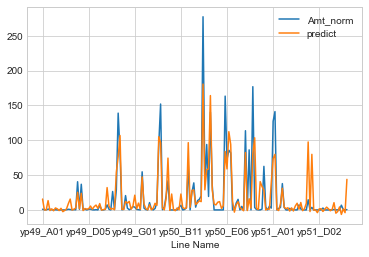

In [30]:
df3.plot(y = ['Amt_norm','predict'], x =  'Line Name')

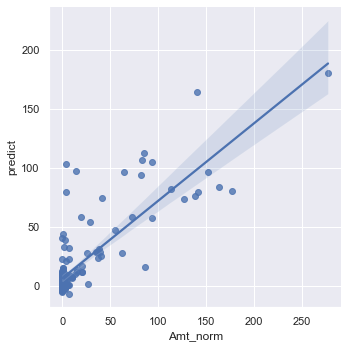

In [31]:
import seaborn as sns
from scipy.stats import pearsonr

#set seaborn plotting aesthetics as default
sns.set()

sns.set_context("paper", font_scale=6.0, rc={"lines.linewidth": 1.5})
sns.set(rc = {'figure.figsize':(10,10)})

sns.lmplot(data=df3, x="Amt_norm", y="predict",  palette="viridis")
None

### Learning curve

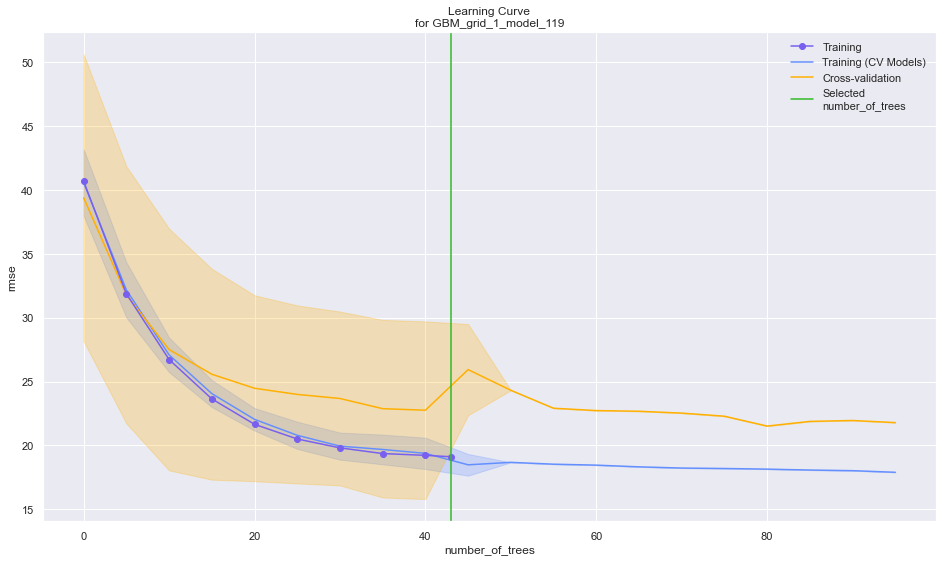

In [151]:

learning_curve = uploaded_model.learning_curve_plot()
learning_curve


### Find predicted genotypes

In [33]:
import numpy as np

In [67]:
all_genotypes = pd.read_csv('../notebooks/systematic_names_on_all_combinations')

all_genotypes_df = h2o.H2OFrame(pd.concat([all_genotypes], axis='columns'))
all_genotypes_df

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


0,1,2,3
1,1,5,1
1,1,5,2
1,1,5,3
1,1,5,4
1,1,5,5
1,1,5,6
1,1,5,7
1,1,5,8
1,1,5,9
1,1,5,10


In [133]:
# this is the dataframe that we used for training bu 
input_fixed = new_input_for_ml[['0','1','2','3']]
input_fixed

,0,1,2,3
0,1,2,5,1
1,1,3,8,1
2,1,3,8,2
3,1,2,6,2
4,1,1,5,3
...,...,...,...,...
161,8,3,6,8
162,8,1,8,9
163,8,4,5,9
164,8,3,7,10


In [134]:
df_diff = all_genotypes[~all_genotypes.apply(tuple,1).isin(input_fixed.apply(tuple,1))]
len(df_diff)

1122

In [135]:
# make the diff into a df 
all_genotypes_df = h2o.H2OFrame(pd.concat([df_diff], axis='columns'))
#all_genotypes_df['0']= all_genotypes_df['0'].asfactor()
#all_genotypes_df['1']= all_genotypes_df['1'].asfactor()
#all_genotypes_df['2'] = all_genotypes_df['2'].asfactor()
#all_genotypes_df['3'] = all_genotypes_df['3'].asfactor()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


## Using the best model to predict the phenotypes that has not been sampled

In [136]:
predicted = best_model.predict(all_genotypes_df)

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [137]:
len(predicted)

1122

In [147]:
predicted_norm = predicted.as_data_frame()
predicted_list = predicted_norm['predict'].values.tolist()

In [144]:
df_diff['predicted_norm_strict'] = predicted_list
predicted_merged_sorted = df_diff.sort_values('predicted_norm_strict', ascending=False)
predicted_merged_sorted

/var/folders/2f/lw3sfzbs7l7f_q1knzbtbwrr0000gp/T/ipykernel_3465/1204589776.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_diff['predicted_norm_strict'] = predicted_list


,0,1,2,3,predicted_norm_strict
699,5,2,6,10,177.853214
698,5,2,6,9,177.853214
697,5,2,6,8,177.853214
696,5,2,6,7,177.853214
695,5,2,6,6,177.853214
...,...,...,...,...,...
1143,8,1,7,4,-8.623331
1149,8,1,7,10,-8.623331
1148,8,1,7,9,-8.623331
1146,8,1,7,7,-8.623331


In [146]:
g8h_list_of_index = ["Cacu", "Opum","Cro","Vmin","Smus","Rsep","Oeu","Ccal"]
cpr_list_of_index = ["Cro", "Aan","Ara","Clo","Rse","Ahu","Ani","Cac","Oeu","Cpo"]
promoters = ["CYC1", "ENO2","PCK1","RPL15B", "CCW12", "TPI1","MLS1","URE2"]

g8h_genotype = []
cpr_genotype = []

pg8h_genotype = []
pcpr_genotype = []

predicted_list = []
# adding index of genotypes to individual rows 
for index, row in predicted_merged_sorted.iterrows():
    g8h_genotype.append(g8h_list_of_index[int(row['0'])-1])
    cpr_genotype.append(cpr_list_of_index[int(row['3'])-1])
    pg8h_genotype.append(promoters[int(row['1'])-1])
    pcpr_genotype.append(promoters[int(row['2'])-1])
    predicted_list.append(row['predicted_norm_strict'])
    
    
list_of_lists = [g8h_genotype,pg8h_genotype,pcpr_genotype, cpr_genotype, predicted_list  ]


df_with_genotypes = pd.DataFrame(list_of_lists )
df_with_genotypes = df_with_genotypes.T
df_with_genotypes.columns = ['G8H', 'pG8H', 'pCPR', 'CPR', 'Predicted_stric_production']
df_with_genotypes.head(20)


,G8H,pG8H,pCPR,CPR,Predicted_stric_production
0,Smus,ENO2,TPI1,Cpo,177.853214
1,Smus,ENO2,TPI1,Oeu,177.853214
2,Smus,ENO2,TPI1,Cac,177.853214
3,Smus,ENO2,TPI1,Ani,177.853214
4,Smus,ENO2,TPI1,Ahu,177.853214
5,Smus,ENO2,TPI1,Rse,177.853214
6,Smus,ENO2,TPI1,Clo,177.853214
7,Smus,ENO2,TPI1,Aan,177.853214
8,Smus,ENO2,TPI1,Cro,177.853214
9,Smus,ENO2,CCW12,Cpo,158.979444


In [153]:
df_with_genotypes.to_csv('../data/processed/ML_predicted/2022_2807_non_categorical_GBM_grid_1_AutoML_2_20220728_95208_model_119')